In [1]:
import requests
from lxml import etree

In [2]:
def get_detail_info(detail_url,headers,proxies):
    response = requests.get(detail_url,headers=headers,proxies=proxies)
    html = etree.HTML(response.text)
    time= html.xpath('//div[@class="open-date"]/span[@class="content"]/text()')
    if time==[]:
        return '时间待定'
    else :
        return time[0]

In [3]:
max_page=91

In [4]:
resblock_names=[]
districts=[]
reference_avg_prices=[]
resblock_frame_area_ranges=[]
house_times=[]
import time
import random
import re
i=0
proxy_api=input()
while i <91:
    url = f'https://wh.fang.lianjia.com/loupan/pg{i+1}/?_t=1'

    headers={
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
        'Cookie': 'select_city=420100; lianjia_ssid=1a883716-cead-4a4f-b9d2-97bce5bebda9; lianjia_uuid=9bb8c59b-f9bb-4c49-84df-d2bde445dcd6; digData=%7B%22key%22%3A%22loupan_index%22%7D; _ga=GA1.2.122660177.1672814560; _gid=GA1.2.212902581.1672814560; _jzqa=1.1839461567770515200.1672814561.1672814561.1672814561.1; _jzqc=1; _jzqckmp=1; _qzjc=1; f-token=YmoTmEGIn4Ao66H4xH7A0EoaZBguJVoXvjmk39e6oIQX+P1d903ui2FHS9W5NYraCylIcyPbSNDcErErpqmEvPGNtns1bCWsSHat+isqVb+VKZqSSPPI25ASbS4aR2+FpHEAOPmWcbxZRryqlnFWXriOqqR/IQ==; cy_ip=116.162.2.224; _gat=1; _gat_global=1; _gat_new_global=1; _gat_dianpu_agent=1; login_ucid=2000000299722909; lianjia_token=2.0015bf145c7dc3112d04123d6d90252feb; lianjia_token_secure=2.0015bf145c7dc3112d04123d6d90252feb; security_ticket=Ka9Jr1pou96hEWOVxi1Ey9fTXkAAphEYRPb7GakZMHzdxmGzyIZqRCtvrwsR5kxvtFnqEvFHr3YhgnVWZgRv9mRHfIk65N4f6dLPISwLJamEkBHFee2SmnsHZsxgW0AiolIhgYaN+FH8nW6YV/A2PI3PsldU/2LiVDhRppp0YvI=; _jzqb=1.4.10.1672814561.1; _qzja=1.1078724221.1672814561088.1672814561088.1672814561088.1672815319862.1672815362273.0.0.0.4.1; _qzjb=1.1672814561088.4.0.0.0; _qzjto=4.1.0; srcid=eyJ0IjoiXCJ7XFxcImRhdGFcXFwiOlxcXCJjYmUzYTM1ZGY5YWU4YWIwZmI1NWUzYjI3MjI1NGIxYTA3ZjkxMmZhOTMyZDU1NDk1NzdhYTY1ZTc0ZTI4ZTA1M2I1NzljMGRhNWZjNmFlNTY1MWY0YzE3ZjAwOTUwZDI5ZTdjY2NmZWQyYzcxYmY1YTk4NGMxMWY5NmJhZmRjOTZjMjU0N2QxYjVmZThlOTEzMzRiN2MzNDFhZmNhYjk2MjBhMTRkNjRlNzI0ZWE4ZWMyYmI1MjIwODJmOTIwZDMyMGY4MzliOTJlZGNiYjQ5ODI0YTM3ZTk1ZmViZDVjOGQ4YjkwY2U4ZTBkNmVjZmE1NmY5YWUzZWQ1YjRlNjQ0XFxcIixcXFwia2V5X2lkXFxcIjpcXFwiMVxcXCIsXFxcInNpZ25cXFwiOlxcXCI5NmJkZTE2ZlxcXCJ9XCIiLCJyIjoiaHR0cHM6Ly93aC5mYW5nLmxpYW5qaWEuY29tL2xvdXBhbi9wZzIvIiwib3MiOiJ3ZWIiLCJ2IjoiMC4xIn0=; lj_newh_session=eyJpdiI6Ik1uVjl3alA5K1pORUZ0Y0lkWjRlNHc9PSIsInZhbHVlIjoiRm1yWTREc1I3K1B1dGI0Q0ozVjk0dDdQbllLMEhHZ1dWc0txaGx1TjNtXC8xWDU2WHpRd2Jtd2tyUVFwRUROcDdqT01CNmJNTHVxTXZYTGRHY240MnZRPT0iLCJtYWMiOiJjNDNhMDMxODEyMTMzMzhkOWY2YmUyMjYxNTdmZjgwZTE0MGVjMDY3ZmYwMzIzYmMwNzE2Y2ZkNGU5MWYyNGU2In0%3D',
        'Referer': 'https://wh.fang.lianjia.com/loupan/pg2/'
 }
    
    res=requests.get(proxy_api)
    api=res.text.split('\n')  # 将字符串分割位列表
    del(api[-1])  # 删除最后一个空的元素

    random_ip=random.choice(api)  # 随机选取一个
    ip=random_ip.strip()  # 删除空格
    print('正在使用{0}IP'.format(ip))
    proxies={
        'https':'http://'+ip
    }
    i+=1
    try:
        res = requests.get(url, headers=headers,proxies=proxies)
        #设置随机时间
        t=random.uniform(2,4)
        print(f'需要睡眠{t}s！')
        time.sleep(t)
        print('睡眠完成！')
        res_json=res.json()
    
        resblock_name=[i['resblock_name'] for i in res_json['data']['list']]
        district=[i['district'] for i in res_json['data']['list']]
        reference_avg_price=[i['reference_avg_price'] for i in res_json['data']['list']]
        resblock_frame_area_range=[i['resblock_frame_area_range'] for i in res_json['data']['list']]
        project_name=[i['project_name'] for i in res_json['data']['list']]
        house_detail = ['https://wh.fang.lianjia.com/loupan/p_'+i for i in project_name]
        house_time = [get_detail_info(i,headers,proxies) for i in house_detail]
    
    
        resblock_names.extend(resblock_name)
        districts.extend(district)
        reference_avg_prices.extend(reference_avg_price)
        resblock_frame_area_ranges.extend(resblock_frame_area_range)
        house_times.extend(house_time)
    
        print(f'Page: {i}, DataNum: {len(resblock_name)}, Total: {len(resblock_names)}')
        
    except Exception as e:
        i-=1
        print('IP{0}发生错误!')

http://http.tiqu.letecs.com/getip3?num=400&type=1&pro=&city=0&yys=0&port=11&pack=287607&ts=0&ys=0&cs=0&lb=1&sb=0&pb=4&mr=1&regions=&gm=4
正在使用114.99.11.223:4215IP
需要睡眠3.853511738893417s！
睡眠完成！
IP{0}发生错误!
正在使用125.106.226.127:4278IP
需要睡眠2.552211062817868s！
睡眠完成！
Page: 1, DataNum: 10, Total: 10
正在使用180.120.180.132:4245IP
需要睡眠3.1925910305522134s！
睡眠完成！
Page: 2, DataNum: 10, Total: 20
正在使用1.83.248.213:4227IP
需要睡眠2.588895029685517s！
睡眠完成！
Page: 3, DataNum: 10, Total: 30
正在使用180.117.197.49:4245IP
需要睡眠3.7467665955992677s！
睡眠完成！
Page: 4, DataNum: 10, Total: 40
正在使用218.91.127.136:4221IP
需要睡眠2.8760075832129024s！
睡眠完成！
Page: 5, DataNum: 10, Total: 50
正在使用122.188.192.171:4224IP
需要睡眠2.3871528665791213s！
睡眠完成！
Page: 6, DataNum: 10, Total: 60
正在使用175.166.88.186:4245IP
需要睡眠3.539612745340621s！
睡眠完成！
Page: 7, DataNum: 10, Total: 70
正在使用171.95.155.239:4213IP
需要睡眠2.816345615967335s！
睡眠完成！
IP{0}发生错误!
正在使用121.205.222.10:4237IP
IP{0}发生错误!
正在使用119.112.203.164:4213IP
需要睡眠2.545770354110819s！
睡眠完成！
Page: 8, DataNu

KeyboardInterrupt: 

In [5]:
len(resblock_names), len(districts), len(reference_avg_prices), len(resblock_frame_area_ranges), len(house_times)

(729, 729, 729, 729, 729)

In [17]:
c=reference_avg_prices[725]

In [21]:
for i in resblock_frame_area_ranges:
    if i=='':
        index_=resblock_frame_area_ranges.index(i)
        resblock_frame_area_ranges[index_]='暂未成型'
    else:
        continue

In [22]:
import pandas as pd
data = pd.DataFrame([resblock_names, districts, reference_avg_prices, resblock_frame_area_ranges, house_times, ], index=['楼盘名称', '区域', '单价', '面积', '开盘时间']).T
data

,楼盘名称,区域,单价,面积,开盘时间
0,招商·武汉城建未来中心,沌口开发区,17000,97-190㎡,2022-10-01
1,万科东湖堤白,洪山,23000,93-128㎡,时间待定
2,武汉宝龙世家,新洲,8500,95-125㎡,2021-11-26
3,武汉二十四城,东西湖,11500,79-142㎡,2021-05-17
4,城投联投誉江南,洪山,18750,110-177㎡,2021-09-25
...,...,...,...,...,...
724,武汉碧桂园天玺湾,江夏,30000,174-450㎡,2020-07-24
725,文腾藏珑苑,新洲,0,暂未成型,2018-09
726,金银湖1号院,东西湖,20000,暂未成型,2020-05-16
727,碧桂园晴川府,汉阳,18000,暂未成型,2019-08


In [23]:
data.to_excel('wuhanfangajia.xlsx')

# 柱状图

In [25]:
data = pd.read_excel('wuhanfangajia.xlsx', index_col=0)

In [26]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  

In [27]:
data[['区域', '单价' ]]

,区域,单价
0,沌口开发区,17000
1,洪山,23000
2,新洲,8500
3,东西湖,11500
4,洪山,18750
...,...,...
724,江夏,30000
725,新洲,0
726,东西湖,20000
727,汉阳,18000


In [28]:
all_type=[]
[all_type.extend(i.split()) for i in list(data['区域'])]
all_type

['沌口开发区',
 '洪山',
 '新洲',
 '东西湖',
 '洪山',
 '东湖高新',
 '蔡甸',
 '硚口',
 '洪山',
 '黄陂',
 '汉阳',
 '东西湖',
 '东湖高新',
 '硚口',
 '黄陂',
 '新洲',
 '蔡甸',
 '黄陂',
 '黄陂',
 '江汉',
 '蔡甸',
 '黄陂',
 '汉阳',
 '东湖高新',
 '黄陂',
 '沌口开发区',
 '蔡甸',
 '江岸',
 '沌口开发区',
 '江岸',
 '汉阳',
 '黄陂',
 '洪山',
 '东西湖',
 '黄陂',
 '洪山',
 '蔡甸',
 '江夏',
 '江夏',
 '江夏',
 '青山',
 '黄陂',
 '黄陂',
 '黄陂',
 '新洲',
 '汉阳',
 '青山',
 '黄陂',
 '东湖高新',
 '黄陂',
 '蔡甸',
 '东西湖',
 '江汉',
 '洪山',
 '硚口',
 '沌口开发区',
 '黄陂',
 '蔡甸',
 '新洲',
 '沌口开发区',
 '新洲',
 '武昌',
 '江汉',
 '沌口开发区',
 '汉阳',
 '青山',
 '蔡甸',
 '东湖高新',
 '沌口开发区',
 '东湖高新',
 '青山',
 '武昌',
 '硚口',
 '武昌',
 '江夏',
 '汉阳',
 '蔡甸',
 '黄陂',
 '东西湖',
 '汉阳',
 '洪山',
 '东西湖',
 '洪山',
 '沌口开发区',
 '黄陂',
 '青山',
 '洪山',
 '洪山',
 '汉阳',
 '沌口开发区',
 '武昌',
 '东湖高新',
 '汉阳',
 '黄陂',
 '黄陂',
 '黄陂',
 '东湖高新',
 '江汉',
 '蔡甸',
 '东西湖',
 '汉阳',
 '硚口',
 '新洲',
 '黄陂',
 '洪山',
 '江岸',
 '江岸',
 '蔡甸',
 '黄陂',
 '蔡甸',
 '东湖高新',
 '东湖高新',
 '沌口开发区',
 '黄陂',
 '汉阳',
 '武昌',
 '蔡甸',
 '蔡甸',
 '沌口开发区',
 '江汉',
 '洪山',
 '黄陂',
 '洪山',
 '硚口',
 '江汉',
 '江夏',
 '沌口开发区',
 '黄陂',
 '汉阳',
 '黄陂',
 '江汉',
 '江汉',
 '洪山',
 '蔡甸',

In [29]:
data1=list(data['区域'])
data2=list(data['单价'])
dic={}
for i in range(len(list(data['区域']))):
    if data1[i] in dic:
        dic[data1[i]]+=data2[i]
    else:
        dic[data1[i]]=data2[i]
dic

{'沌口开发区': 455900,
 '洪山': 1348523,
 '新洲': 274338,
 '东西湖': 1142349,
 '东湖高新': 1615300,
 '蔡甸': 536038,
 '硚口': 612800,
 '黄陂': 1045014,
 '汉阳': 990042,
 '江汉': 758900,
 '江岸': 1283105,
 '江夏': 515505,
 '青山': 384634,
 '武昌': 701446,
 '汉南': 164100,
 '夷陵区': 8000,
 '葛店开发区': 15600,
 '梁子湖区': 20952,
 '襄州区': 9100,
 '西陵区': 11000,
 '伍家岗区': 10500}

In [30]:
from collections import Counter

In [31]:
counter_type = Counter(all_type).items()
counter_type = sorted(counter_type, key=lambda x: x[1], reverse=True)
counter_type

[('东湖高新', 87),
 ('黄陂', 87),
 ('东西湖', 75),
 ('洪山', 74),
 ('汉阳', 53),
 ('蔡甸', 47),
 ('江岸', 45),
 ('江夏', 42),
 ('硚口', 39),
 ('江汉', 36),
 ('新洲', 33),
 ('武昌', 33),
 ('沌口开发区', 32),
 ('青山', 22),
 ('汉南', 16),
 ('葛店开发区', 2),
 ('梁子湖区', 2),
 ('夷陵区', 1),
 ('襄州区', 1),
 ('西陵区', 1),
 ('伍家岗区', 1)]

In [32]:
dic2=[(i[0],dic[i[0]]/i[1]) for i in counter_type]
dic2
    

[('东湖高新', 18566.666666666668),
 ('黄陂', 12011.655172413793),
 ('东西湖', 15231.32),
 ('洪山', 18223.283783783783),
 ('汉阳', 18680.037735849055),
 ('蔡甸', 11405.063829787234),
 ('江岸', 28513.444444444445),
 ('江夏', 12273.92857142857),
 ('硚口', 15712.820512820514),
 ('江汉', 21080.555555555555),
 ('新洲', 8313.272727272728),
 ('武昌', 21255.939393939392),
 ('沌口开发区', 14246.875),
 ('青山', 17483.363636363636),
 ('汉南', 10256.25),
 ('葛店开发区', 7800.0),
 ('梁子湖区', 10476.0),
 ('夷陵区', 8000.0),
 ('襄州区', 9100.0),
 ('西陵区', 11000.0),
 ('伍家岗区', 10500.0)]

In [33]:
types = [i[0] for i in dic2]
nums = [i[1] for i in dic2]

In [34]:
plt.figure(figsize=(20,20), dpi=400)

<Figure size 8000x8000 with 0 Axes>

<Figure size 8000x8000 with 0 Axes>

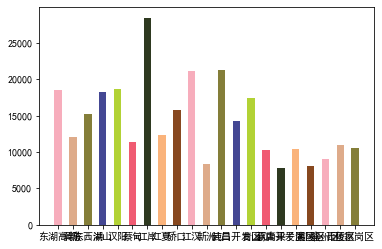

In [35]:
plt.bar(x=types, 
        height=nums, 
        width=0.5, 
        color=['#F7ADBC', '#DEAB8A', '#847E39', '#444793', '#B2D235', '#F05B72', '#2E3920', '#FAB37B', '#87481F'])
plt.show()

# 根据时间分类


In [36]:
data3=list(data['开盘时间'])
data3

['2022-10-01',
 '时间待定',
 '2021-11-26',
 '2021-05-17',
 '2021-09-25',
 '2021-09-09',
 '2022-08-01',
 '2018-11-13',
 '2018-10',
 '2019-08-21',
 '2021-04-09',
 '2020-06-10',
 '2020-12-20',
 '2021-06-04',
 '2021-09-08',
 '2019-06-15',
 '2021-09-24',
 '2019-09-06',
 '2016-08-21',
 '2022-04-27',
 '2021-04-30',
 '2020-11-20',
 '2021-12-10',
 '2019-08-30',
 '2009-09-20',
 '2018-08-18',
 '2019-10',
 '2021-06-13',
 '2018-10',
 '2019-09-29',
 '2020-11-23',
 '2021-11',
 '2015-11',
 '2017-09-19',
 '2022-04-22',
 '2017-12-06',
 '2017-12-29',
 '2022-06-14',
 '2018-05-29',
 '2019-09-17',
 '时间待定',
 '2017-02-25',
 '2020-12-30',
 '2019-09-23',
 '2019-12-24',
 '2017-06',
 '2017-07-02',
 '2020-10-01',
 '2020-06',
 '2015-05-10',
 '2020-09',
 '2021-05-20',
 '2018-06-30',
 '2020-10',
 '2016-10-05',
 '2020-07-12',
 '2019-08-07',
 '2017-05-27',
 '2020-09',
 '2018-12-01',
 '2017-12-14',
 '2016-09-24',
 '2019-01',
 '2017-07-07',
 '2018-03-19',
 '2022-07-15',
 '2020-10-18',
 '2016-08-02',
 '2016-06-19',
 '2016-08'

In [37]:
for i in data3:
    if i=='时间待定':
        data3.remove(i)
    else:
        continue

In [38]:
data3

['2022-10-01',
 '2021-11-26',
 '2021-05-17',
 '2021-09-25',
 '2021-09-09',
 '2022-08-01',
 '2018-11-13',
 '2018-10',
 '2019-08-21',
 '2021-04-09',
 '2020-06-10',
 '2020-12-20',
 '2021-06-04',
 '2021-09-08',
 '2019-06-15',
 '2021-09-24',
 '2019-09-06',
 '2016-08-21',
 '2022-04-27',
 '2021-04-30',
 '2020-11-20',
 '2021-12-10',
 '2019-08-30',
 '2009-09-20',
 '2018-08-18',
 '2019-10',
 '2021-06-13',
 '2018-10',
 '2019-09-29',
 '2020-11-23',
 '2021-11',
 '2015-11',
 '2017-09-19',
 '2022-04-22',
 '2017-12-06',
 '2017-12-29',
 '2022-06-14',
 '2018-05-29',
 '2019-09-17',
 '2017-02-25',
 '2020-12-30',
 '2019-09-23',
 '2019-12-24',
 '2017-06',
 '2017-07-02',
 '2020-10-01',
 '2020-06',
 '2015-05-10',
 '2020-09',
 '2021-05-20',
 '2018-06-30',
 '2020-10',
 '2016-10-05',
 '2020-07-12',
 '2019-08-07',
 '2017-05-27',
 '2020-09',
 '2018-12-01',
 '2017-12-14',
 '2016-09-24',
 '2019-01',
 '2017-07-07',
 '2018-03-19',
 '2022-07-15',
 '2020-10-18',
 '2016-08-02',
 '2016-06-19',
 '2016-08',
 '2020-10-07',
 

In [39]:
len(data3)

694

In [40]:
data4=[]
for i in range(len(data3)):
    data4.append(data3[i][:7])

In [41]:
data4

['2022-10',
 '2021-11',
 '2021-05',
 '2021-09',
 '2021-09',
 '2022-08',
 '2018-11',
 '2018-10',
 '2019-08',
 '2021-04',
 '2020-06',
 '2020-12',
 '2021-06',
 '2021-09',
 '2019-06',
 '2021-09',
 '2019-09',
 '2016-08',
 '2022-04',
 '2021-04',
 '2020-11',
 '2021-12',
 '2019-08',
 '2009-09',
 '2018-08',
 '2019-10',
 '2021-06',
 '2018-10',
 '2019-09',
 '2020-11',
 '2021-11',
 '2015-11',
 '2017-09',
 '2022-04',
 '2017-12',
 '2017-12',
 '2022-06',
 '2018-05',
 '2019-09',
 '2017-02',
 '2020-12',
 '2019-09',
 '2019-12',
 '2017-06',
 '2017-07',
 '2020-10',
 '2020-06',
 '2015-05',
 '2020-09',
 '2021-05',
 '2018-06',
 '2020-10',
 '2016-10',
 '2020-07',
 '2019-08',
 '2017-05',
 '2020-09',
 '2018-12',
 '2017-12',
 '2016-09',
 '2019-01',
 '2017-07',
 '2018-03',
 '2022-07',
 '2020-10',
 '2016-08',
 '2016-06',
 '2016-08',
 '2020-10',
 '2013-11',
 '2016-12',
 '2020-11',
 '2022-03',
 '2020-09',
 '2020-10',
 '2020-07',
 '2021-08',
 '2017-08',
 '2018-01',
 '2018-09',
 '2021-09',
 '2017-12',
 '2021-04',
 '20

In [42]:
counter_type = Counter(data4).items()
counter_type

dict_items([('2022-10', 5), ('2021-11', 22), ('2021-05', 22), ('2021-09', 21), ('2022-08', 4), ('2018-11', 5), ('2018-10', 10), ('2019-08', 9), ('2021-04', 24), ('2020-06', 6), ('2020-12', 30), ('2021-06', 18), ('2019-06', 6), ('2019-09', 12), ('2016-08', 4), ('2022-04', 5), ('2020-11', 21), ('2021-12', 12), ('2009-09', 1), ('2018-08', 4), ('2019-10', 6), ('2015-11', 5), ('2017-09', 2), ('2017-12', 8), ('2022-06', 3), ('2018-05', 2), ('2017-02', 1), ('2019-12', 18), ('2017-06', 5), ('2017-07', 4), ('2020-10', 27), ('2015-05', 2), ('2020-09', 14), ('2018-06', 6), ('2016-10', 5), ('2020-07', 13), ('2017-05', 3), ('2018-12', 15), ('2016-09', 3), ('2019-01', 3), ('2018-03', 4), ('2022-07', 6), ('2016-06', 3), ('2013-11', 1), ('2016-12', 5), ('2022-03', 11), ('2021-08', 14), ('2017-08', 3), ('2018-01', 3), ('2018-09', 8), ('2017-10', 5), ('2017-11', 5), ('2017-04', 2), ('2019-07', 5), ('2018-07', 6), ('2020-05', 11), ('2021-03', 26), ('2019-05', 5), ('2020-08', 15), ('2014-01', 1), ('2016-0

In [43]:
sorted(counter_type)

[('2006-01', 1),
 ('2008-04', 1),
 ('2009-09', 1),
 ('2010-01', 1),
 ('2010-02', 1),
 ('2010-12', 1),
 ('2011-05', 1),
 ('2011-09', 1),
 ('2012-01', 1),
 ('2012-04', 1),
 ('2012-06', 1),
 ('2012-11', 1),
 ('2012-12', 2),
 ('2013-01', 2),
 ('2013-06', 1),
 ('2013-08', 1),
 ('2013-11', 1),
 ('2013-12', 1),
 ('2014-01', 1),
 ('2014-03', 1),
 ('2014-04', 1),
 ('2014-05', 1),
 ('2014-06', 2),
 ('2014-07', 1),
 ('2014-08', 2),
 ('2014-09', 2),
 ('2014-10', 4),
 ('2014-12', 3),
 ('2015-01', 6),
 ('2015-02', 1),
 ('2015-03', 1),
 ('2015-04', 1),
 ('2015-05', 2),
 ('2015-06', 3),
 ('2015-07', 1),
 ('2015-08', 7),
 ('2015-09', 5),
 ('2015-10', 2),
 ('2015-11', 5),
 ('2015-12', 5),
 ('2016-01', 2),
 ('2016-04', 2),
 ('2016-05', 2),
 ('2016-06', 3),
 ('2016-07', 4),
 ('2016-08', 4),
 ('2016-09', 3),
 ('2016-10', 5),
 ('2016-11', 2),
 ('2016-12', 5),
 ('2017-01', 4),
 ('2017-02', 1),
 ('2017-03', 2),
 ('2017-04', 2),
 ('2017-05', 3),
 ('2017-06', 5),
 ('2017-07', 4),
 ('2017-08', 3),
 ('2017-09', 2